In [90]:
using Plots

In [91]:
T(x; c) = 2*x+c*sinpi(2*x)+0.25#0.5*x*(1-x)

T (generic function with 1 method)

In [92]:
c = 1/(2*pi)-1/16
F(z) = T(z; c = c)

F (generic function with 1 method)

In [93]:
strip_pos(η) = imag.(F.([x+η*im for x in 0:0.001:1]))

strip_pos (generic function with 1 method)

In [94]:
strip_neg(η) = imag.(F.([x-η*im for x in 0:0.001:1]))

strip_neg (generic function with 1 method)

In [95]:
radius_pos(η) = minimum(strip_pos(η))-η

radius_pos (generic function with 1 method)

In [96]:
radius_neg(η) = minimum(abs.(strip_neg(η)))-η

radius_neg (generic function with 1 method)

In [97]:
η_arr = 0:0.001:0.3
val, i = findmax(radius_pos.(η_arr))
@info η_arr[i], val
η = η_arr[i]
ρ = η+val

┌ Info: (0.172, 0.045990490255616356)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/20240515TwoXPlus.ipynb:3


0.21799049025561634

In [98]:
radius_neg(η)

0.045990490255616356

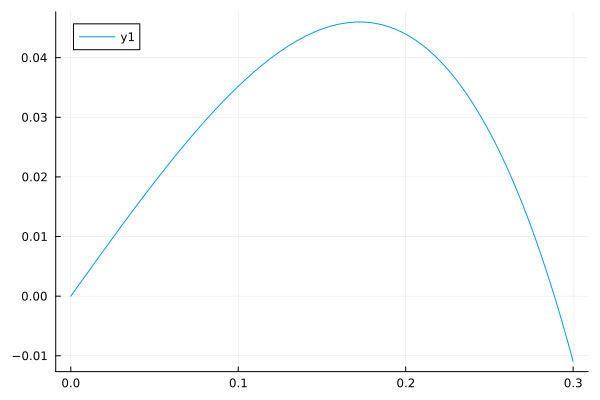

In [99]:
plot(radius_neg, 0, 0.3)

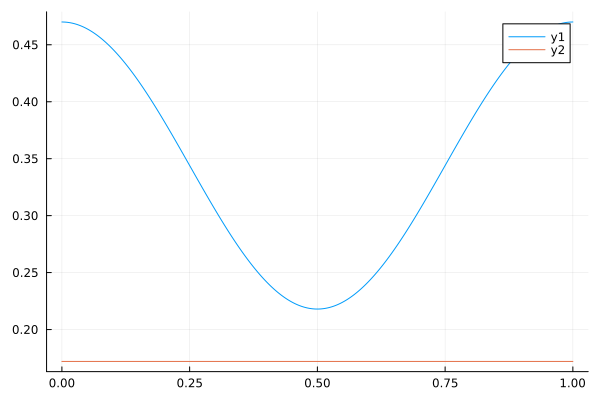

In [100]:
plot(0:0.001:1, strip(η))
plot!(0:0.001:1, fill(η, length(0:0.001:1)))

We want to find now an $\alpha$ that minimizes the right hand side of
$$
||Lf-L_Kf||_{\ell^1}\leq \left(1+2\frac{e^{-2 \pi |\rho-\alpha|}}{1-e^{-2 \pi |\rho-\alpha|}}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right)||f||_{\infty, \alpha}	
$$


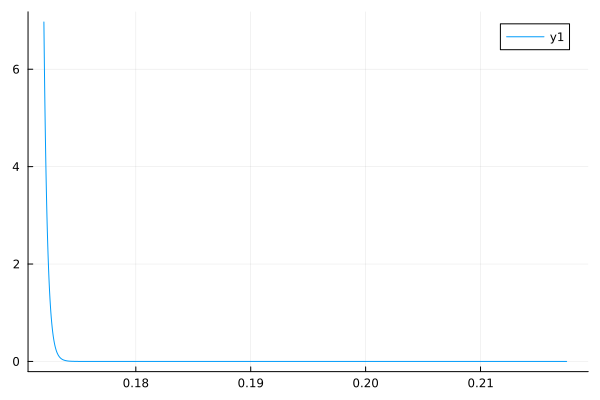

In [101]:
function rhs(α, K; η, ρ)
    coeff_1 = 1+2*(exp(-2*π*(ρ-α)))/(1-(exp(-2*π*(ρ-α))))
    coeff_2 = exp(-2*π*K*α)+exp(-2*π*K*(α-η))
    return coeff_1*coeff_2
end

plot(α -> rhs(α, 512; η = η, ρ = ρ), η, ρ)

In [102]:
α_arr = LinRange(η, ρ, 10000)
val_min, idx = findmin(map(α -> rhs(α, 512; η = η, ρ = ρ), α_arr))
α = α_arr[idx]
@info α, val_min

┌ Info: (0.21767772364521712, 1.549905786925701e-61)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/20240515TwoXPlus.ipynb:4


In [103]:
function weak_strong(μ; η, α, ρ)
    s = α/(α-η)
    coeff_1 = (1/abs(μ))^s
    coeff_2 = 1+2*(exp(-2*π*(ρ-α)))/(1-(exp(-2*π*(ρ-α))))^s
    return coeff_1*coeff_2
end

weak_strong (generic function with 1 method)

In [104]:
bws = weak_strong(1/2; η = η, α = α, ρ = ρ)

4.316227637869035e14

In [105]:
bws*val_min

6.689746193621867e-47